#upload data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving car_price_prediction.csv to car_price_prediction.csv


#Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

from sklearn.preprocessing import LabelEncoder


#*Read* Data

In [3]:
 data = pd.read_csv('car_price_prediction.csv')

# EDA

In [4]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
data.shape

(19237, 18)

In [6]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


Clean And Preprocessing  Data

In [9]:
data.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


Observations:

    No Missing Values:

        All columns (ID, Price, Levy, Manufacturer, Model, Prod.year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel) have 0 missing values.

In [10]:
data.duplicated().sum()

313

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

#**Analysis**

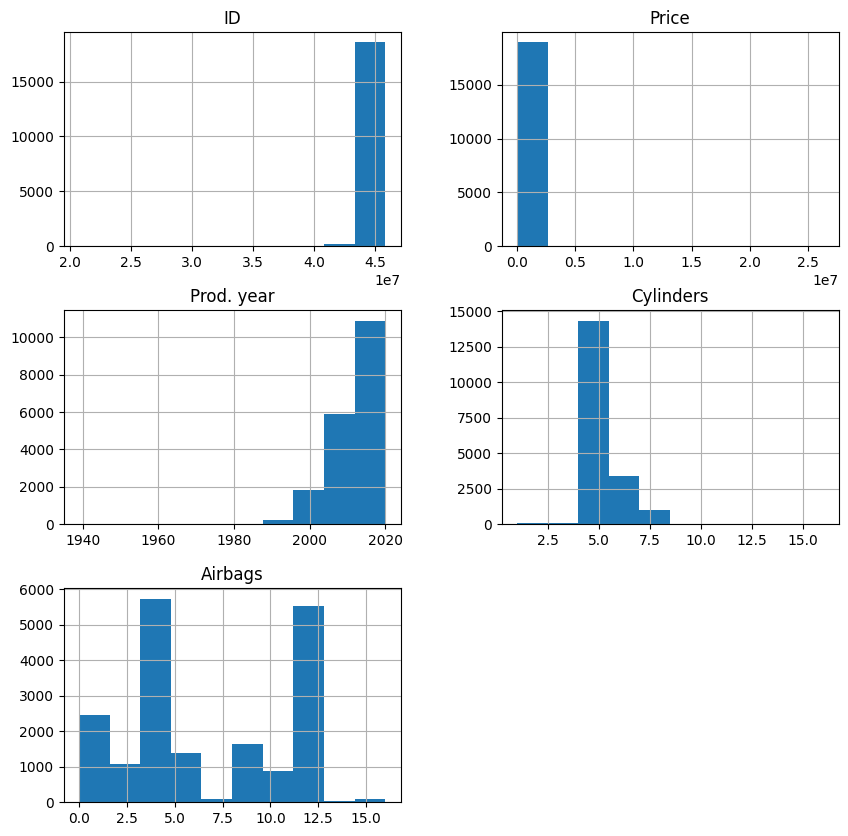

In [13]:
data.hist(figsize=(10,10))
plt.show()

print number of unique *values*

In [14]:
for i in data.columns:
    print(i ,': ' , data[i].nunique())

ID :  18924
Price :  2315
Levy :  559
Manufacturer :  65
Model :  1590
Prod. year :  54
Category :  11
Leather interior :  2
Fuel type :  7
Engine volume :  107
Mileage :  7687
Cylinders :  13
Gear box type :  4
Drive wheels :  3
Doors :  3
Wheel :  2
Color :  16
Airbags :  17


In [15]:
for col in data.columns:
    print(col ,": ", data[col].unique()
    )

ID :  [45654403 44731507 45774419 ... 45804997 45793526 45813273]
Price :  [13328 16621  8467 ... 56814 63886 22075]
Levy :  ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 

extract top 10 cars for analysis

In [16]:
top10cars = data.Manufacturer.value_counts().sort_values(ascending=False)[ : 10]
top10cars

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
BMW,1036
HONDA,960
LEXUS,927
NISSAN,645


plot top 10 cars

<Axes: xlabel='Manufacturer'>

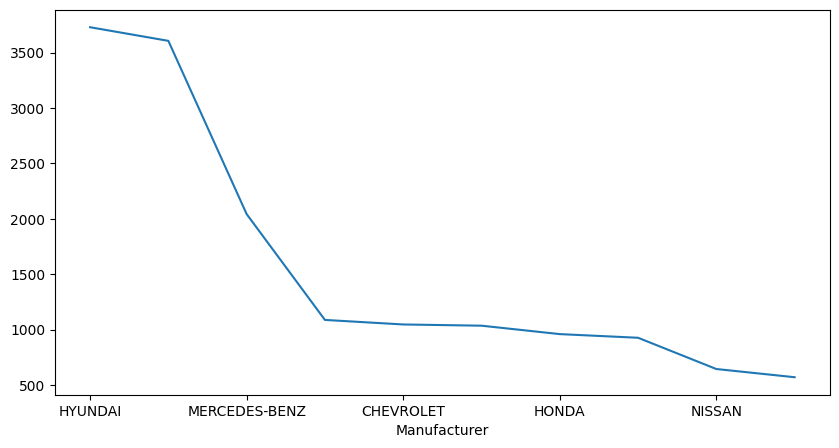

In [17]:
top10cars.plot(figsize=(10,5))

In [18]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


print mean of the price of top 10 cars




In [19]:
top10carsPrices = [data[data.Manufacturer == car]["Price"].mean() for car in list(top10cars.index)]
top10carsPrices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

plot top 10 cars and its prices

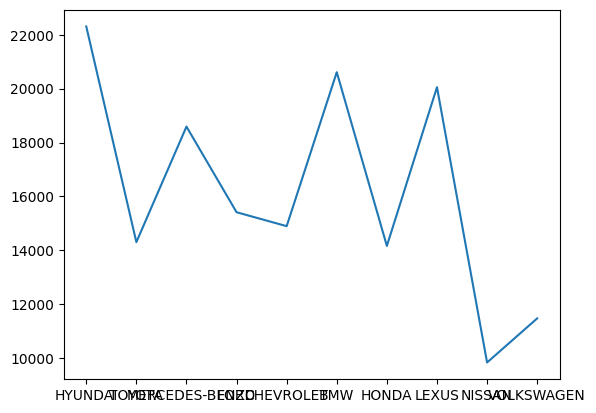

In [20]:
plt.plot(top10cars.index , top10carsPrices)

extract only numeric data from the my data set for analysis

In [21]:
numiric_data = data.select_dtypes('int')

heatmap data correlation

<Axes: >

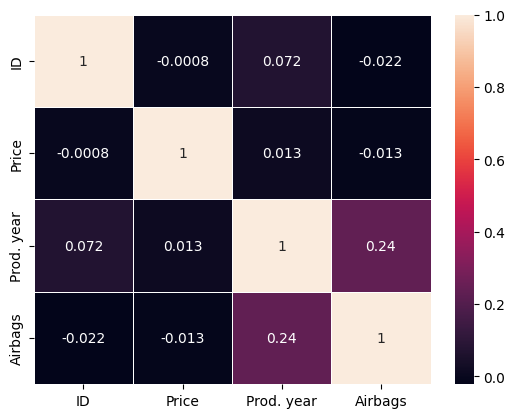

In [22]:
sns.heatmap(numiric_data.corr() , annot=True , linewidths=0.5)

 extract the object data from my data set to do some operations on it

In [23]:
object_data = data.select_dtypes('object')

In [24]:
object_data.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


loop on all the columns of object data to plot them

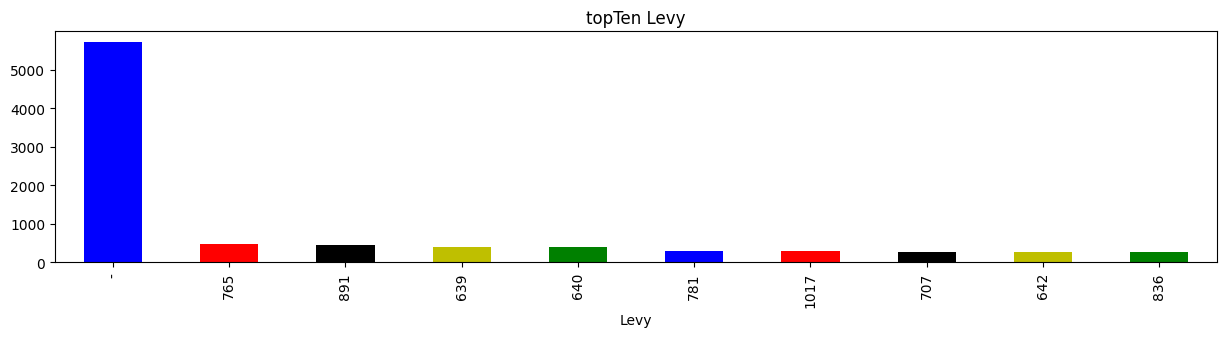

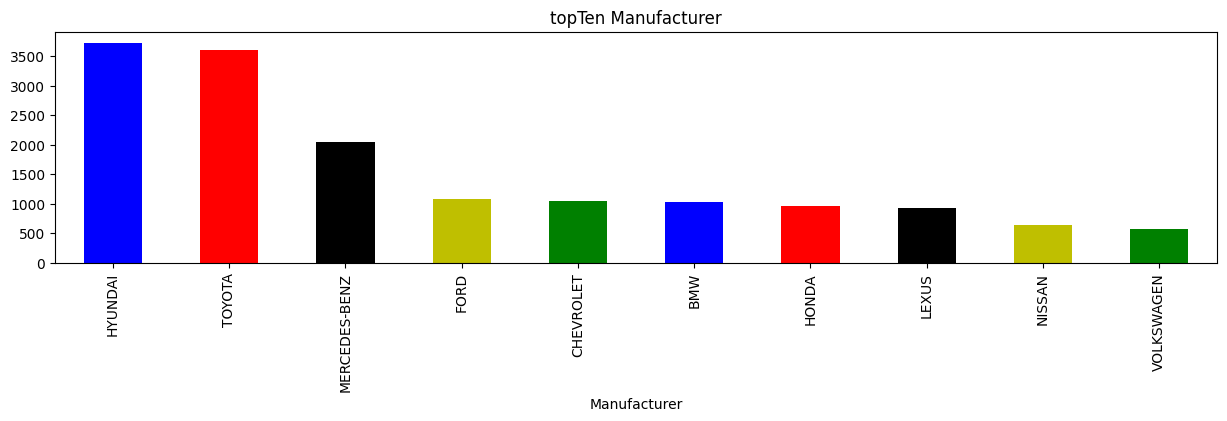

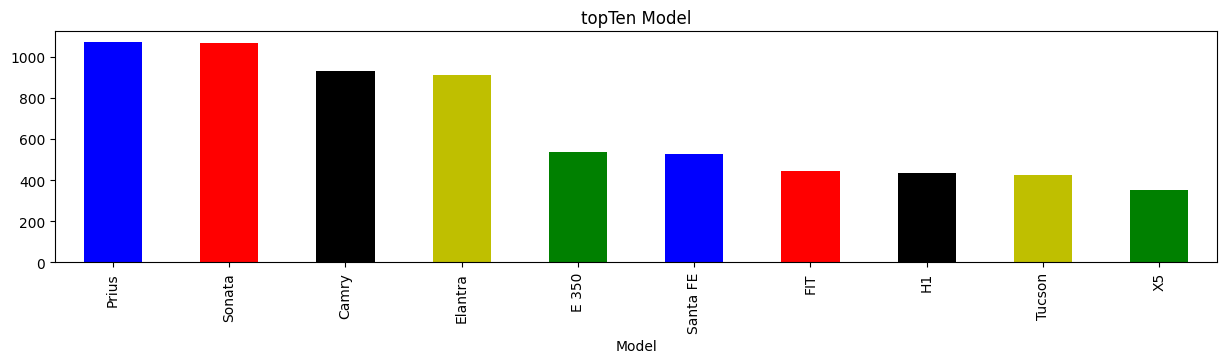

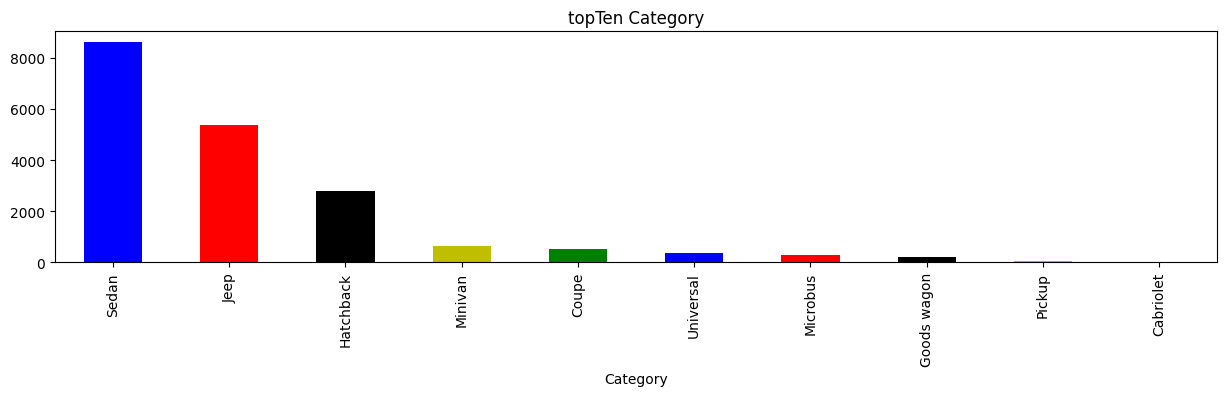

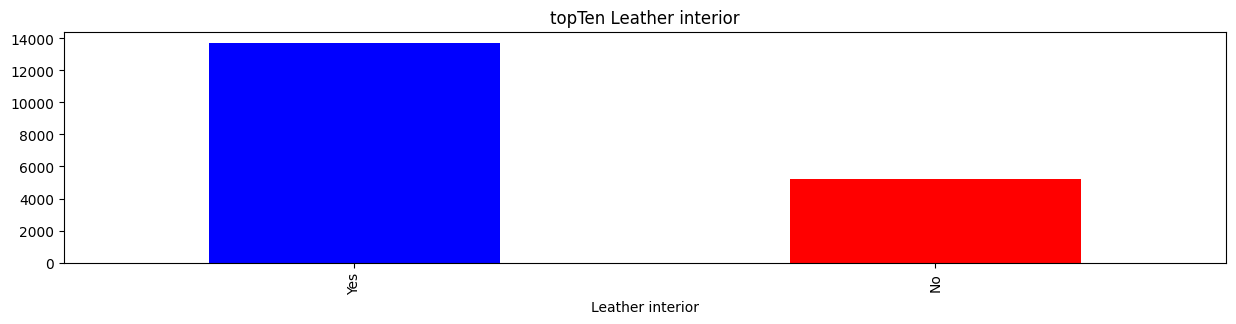

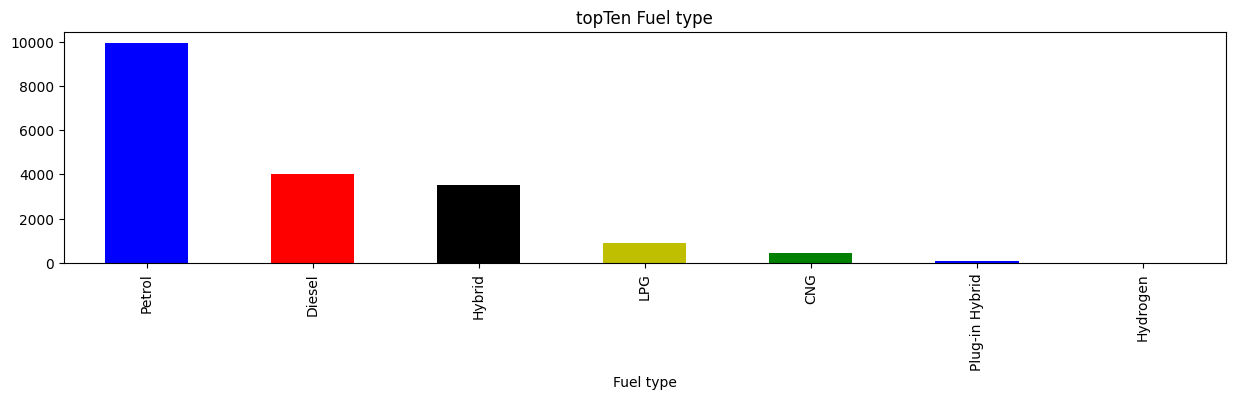

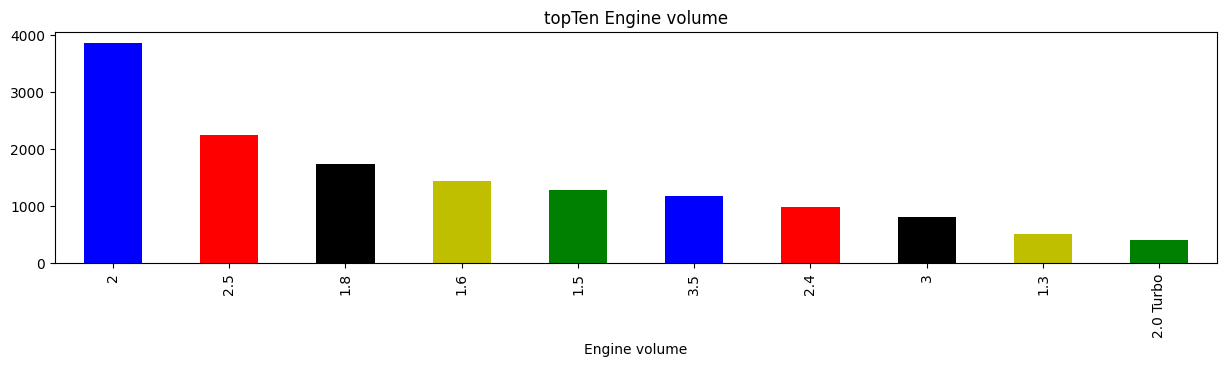

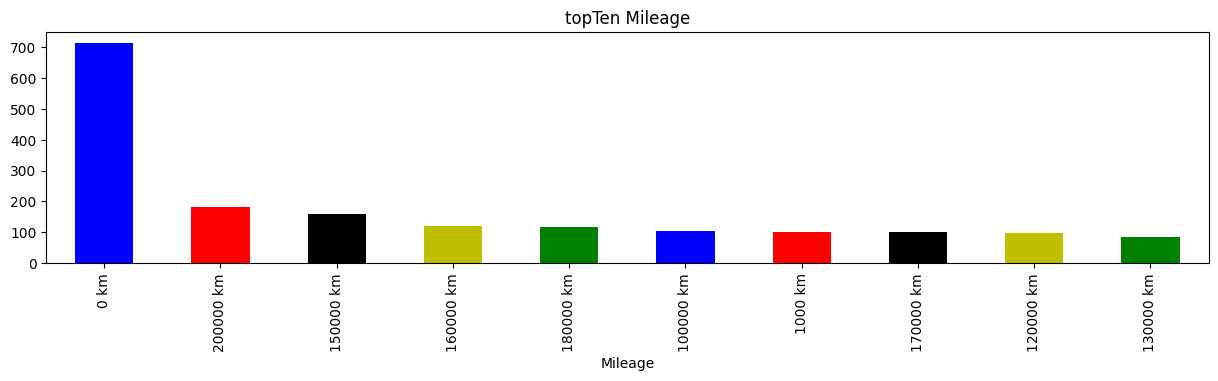

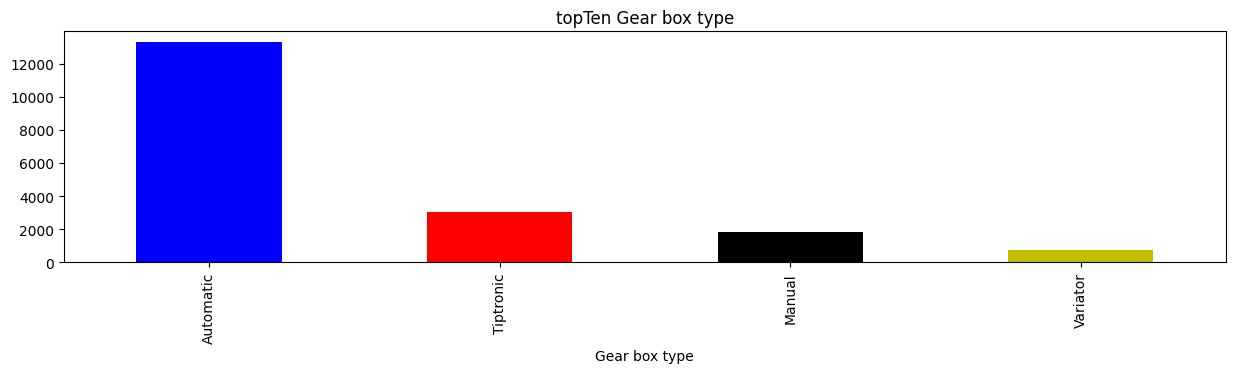

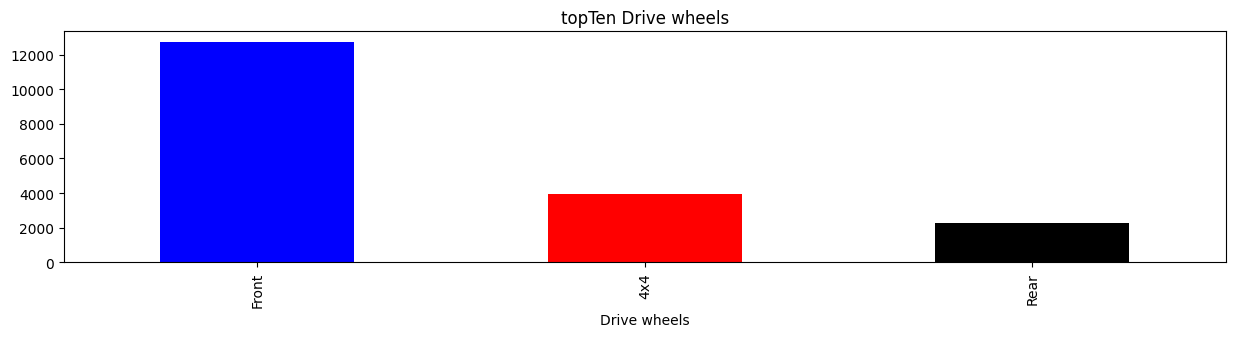

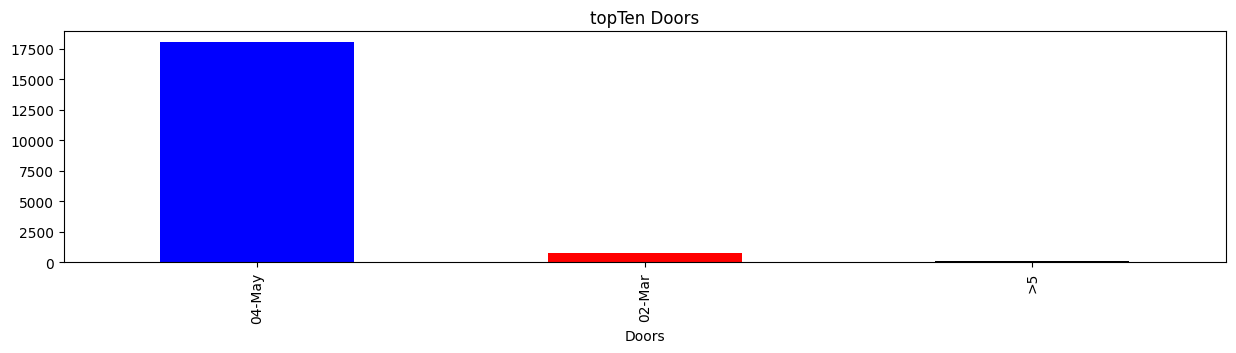

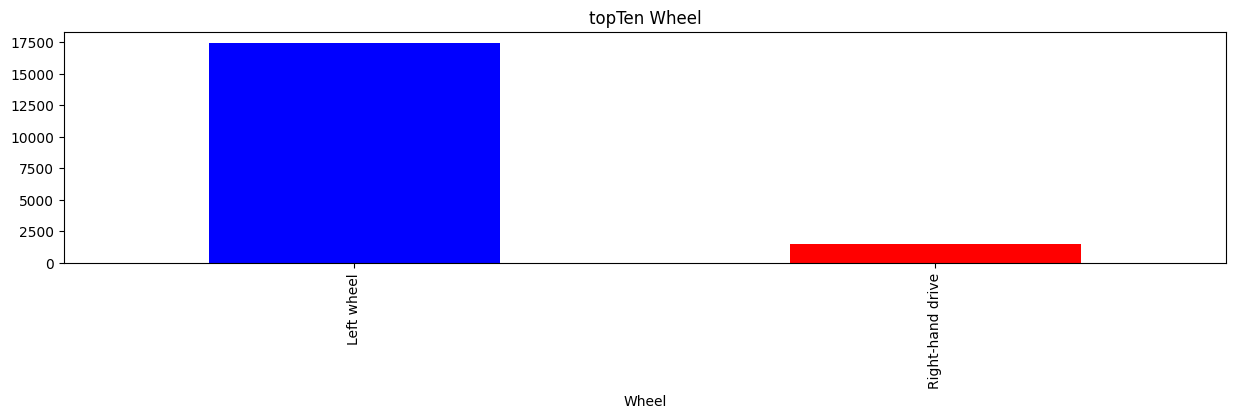

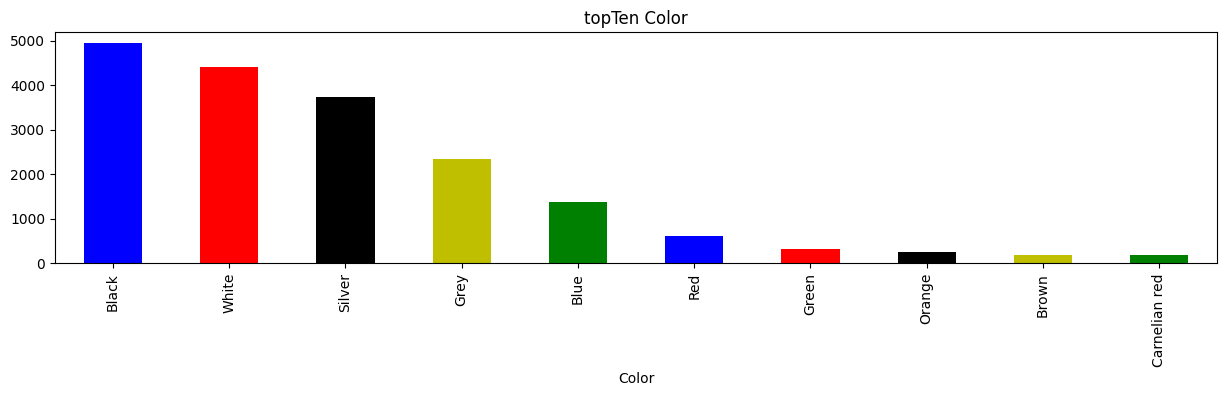

In [25]:
for col in object_data:
    plt.figure(figsize=(15, 3))
    colors = ['b' , 'r' , 'k' , 'y' , 'g']
    topTen = data[col].value_counts().nlargest(10)
    topTen.plot(kind='bar' , color=colors)
    plt.title('topTen ' + col)
    plt.show()

#**Data** Processing

In [26]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


drop ID and DOORS  columns cause i will not need them

In [27]:
data = data.drop(["ID" ,"Doors"] , axis =1 )

Date Column

In [28]:
import datetime
nowDate = datetime.datetime.now()
nowDate

datetime.datetime(2025, 2, 19, 0, 8, 7, 589629)

In [29]:
data["Prod. year"] = data["Prod. year"].astype("int")

add new column carAge instead of the Prod. year column cause this makes the data easy and understandable

In [30]:
data['carAge'] =nowDate.year - data["Prod. year"]
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,carAge
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,26
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,14
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,15
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4,18


scatter plot the carAge and the car price

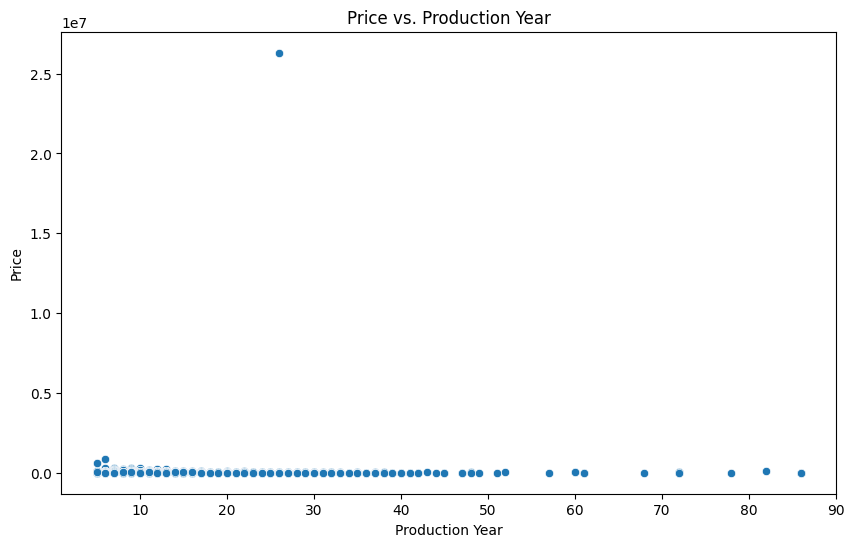

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carAge', y='Price', data=data)
plt.title('Price vs. Production Year')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.show()

now drop the useless Prod. year column

In [32]:
data = data.drop("Prod. year" , axis=True)

In [33]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,carAge
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11


BoxPlot

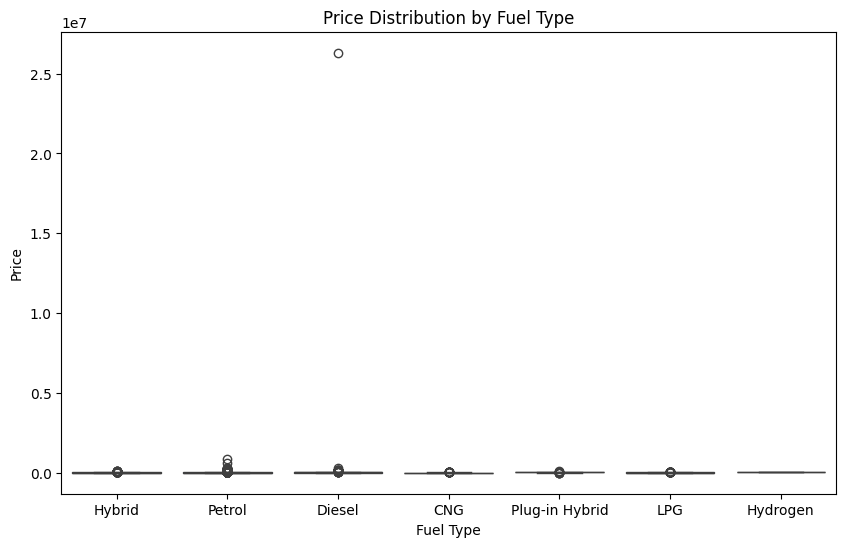

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel type', y='Price', data=data)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

violin plot

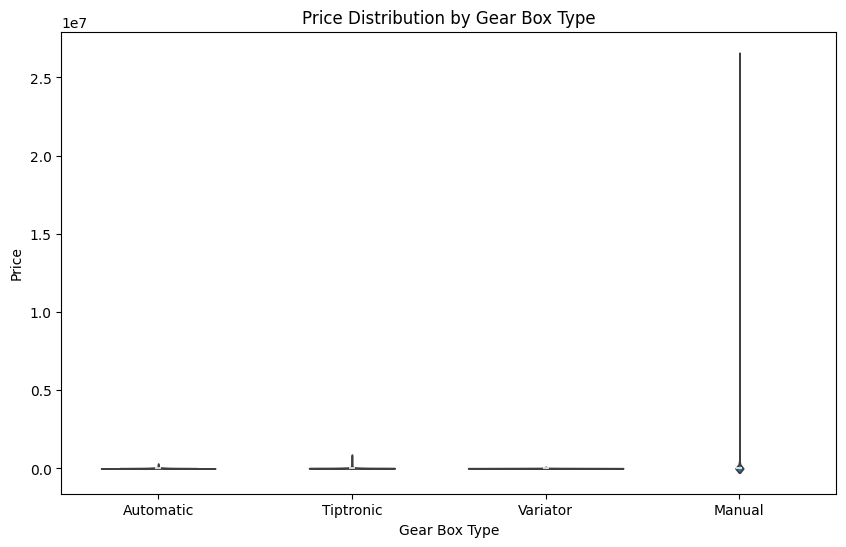

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gear box type', y='Price', data=data)
plt.title('Price Distribution by Gear Box Type')
plt.xlabel('Gear Box Type')
plt.ylabel('Price')
plt.show()

pair plot

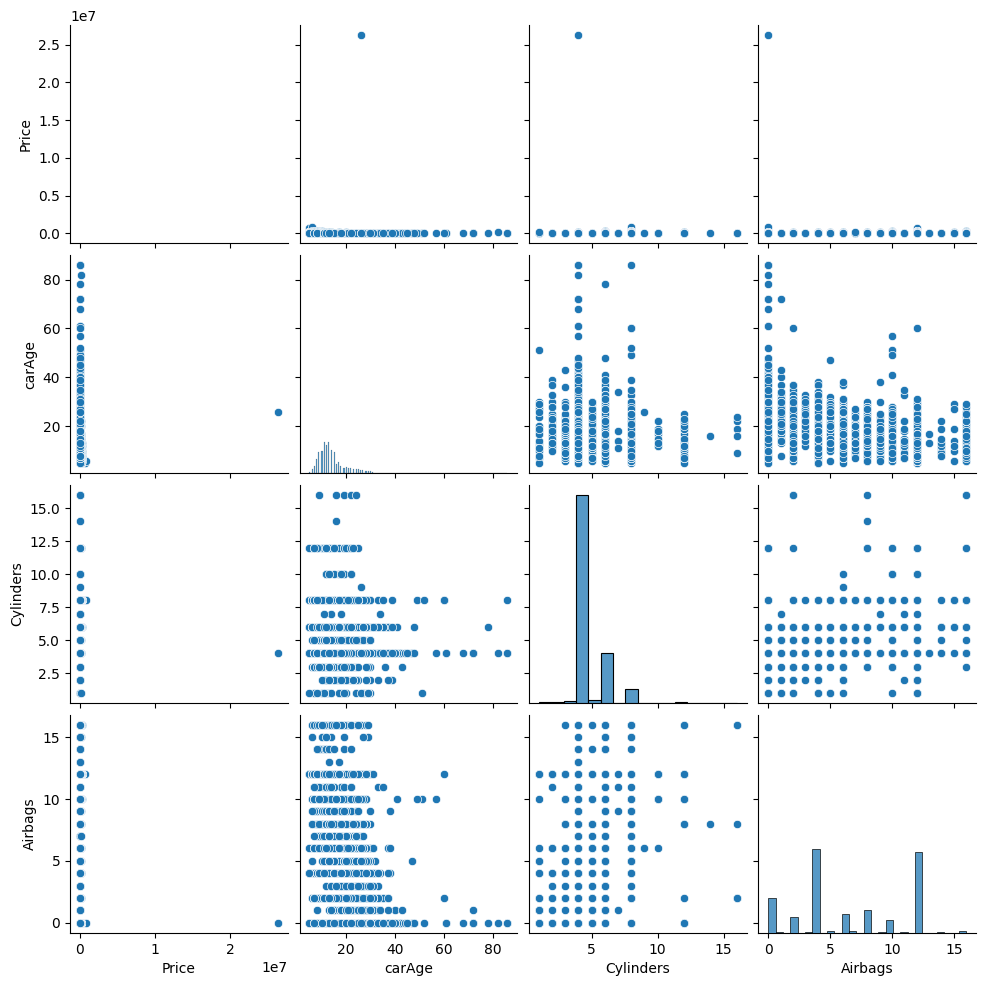

In [36]:
sns.pairplot(data[['Price', 'carAge', 'Engine volume', 'Cylinders', 'Airbags']])
plt.show()

Levy Column

replace levy column with true values instead of '-'

In [37]:
data.Levy.replace({'-' : '0'} , inplace=True)

<ipython-input-37-74c931a89ce1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Levy.replace({'-' : '0'} , inplace=True)


make its type int instead of object

In [38]:
data['Levy'] = data.Levy.astype('int')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  carAge            18924 non-null  int64  
dtypes: float64(1), int64(4), object(11)
memory us

Mileage Columns

replace Mileage column with space instead of 'km' to make its datatype int instead of object

In [40]:
data["Mileage"] = data["Mileage"].str.replace('km', '')

In [41]:
data["Mileage"] = data["Mileage"].astype('int')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  carAge            18924 non-null  int64  
dtypes: float64(1), int64(5), object(10)
memory us

Engine volume

In [43]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

replace Engine volume column with space instead of Turbo to make its datatype also int

In [44]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo' , '')

In [45]:
data['Engine volume'] = data['Engine volume'].astype('float')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  carAge            18924 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usa

#Detect the Outlieres

In [47]:
numeric_data = data.select_dtypes(exclude='object')

for col in numeric_data.columns:
    q1 = numeric_data[col].quantile(0.25)
    q3 = numeric_data[col].quantile(0.75)

    iqr = q3 - q1

    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr

    outliers = numeric_data[(numeric_data[col] < low) | (numeric_data[col] > high)]
    num_outliers = outliers.shape[0]

    total = numeric_data[col].shape[0]
    percent = (num_outliers / total) * 100

    print(f"Number of outliers in {col} is: {num_outliers}")
    print(f"The percentage of outliers in {col} is: {round(percent, 2)}%")

    if num_outliers > 0:
        numeric_data = numeric_data.loc[(numeric_data[col] >= low) & (numeric_data[col] <= high)]



Number of outliers in Price is: 1055
The percentage of outliers in Price is: 5.57%
Number of outliers in Levy is: 161
The percentage of outliers in Levy is: 0.9%
Number of outliers in Engine volume is: 1034
The percentage of outliers in Engine volume is: 5.84%
Number of outliers in Mileage is: 637
The percentage of outliers in Mileage is: 3.82%
Number of outliers in Cylinders is: 3127
The percentage of outliers in Cylinders is: 19.5%
Number of outliers in Airbags is: 0
The percentage of outliers in Airbags is: 0.0%
Number of outliers in carAge is: 1111
The percentage of outliers in carAge is: 8.61%


In [48]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11799 entries, 2 to 19236
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          11799 non-null  int64  
 1   Levy           11799 non-null  int64  
 2   Engine volume  11799 non-null  float64
 3   Mileage        11799 non-null  int64  
 4   Cylinders      11799 non-null  float64
 5   Airbags        11799 non-null  int64  
 6   carAge         11799 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 737.4 KB


In [49]:
object_data = data.select_dtypes('object')

In [50]:
object_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Manufacturer      18924 non-null  object
 1   Model             18924 non-null  object
 2   Category          18924 non-null  object
 3   Leather interior  18924 non-null  object
 4   Fuel type         18924 non-null  object
 5   Gear box type     18924 non-null  object
 6   Drive wheels      18924 non-null  object
 7   Wheel             18924 non-null  object
 8   Color             18924 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


#Encoding Object Data

In [51]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()

for i in range(object_data.shape[1]):
     object_data.iloc[:, i] = la.fit_transform(object_data.iloc[:, i])


#concatenate the numeric and object data ot make final data

In [52]:
data = pd.concat([numeric_data , object_data] , axis=1)
data

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,carAge,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,8467.0,0.0,1.3,200000.0,4.0,2.0,19.0,21,684,3,0,5,3,1,1,1
3,3607.0,862.0,2.5,168966.0,4.0,0.0,14.0,16,661,4,1,2,0,0,0,14
4,11726.0,446.0,1.3,91901.0,4.0,4.0,11.0,21,684,3,1,5,0,1,0,12
5,39493.0,891.0,2.0,160931.0,4.0,4.0,9.0,23,1305,4,1,1,0,1,0,14
6,1803.0,761.0,1.8,258909.0,4.0,12.0,15.0,58,1154,3,1,2,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,1329,9,1,5,2,2,1,14
19227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,0,0,1
19228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,2,0,1
19231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,2,0,7


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 2 to 19232
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             11799 non-null  float64
 1   Levy              11799 non-null  float64
 2   Engine volume     11799 non-null  float64
 3   Mileage           11799 non-null  float64
 4   Cylinders         11799 non-null  float64
 5   Airbags           11799 non-null  float64
 6   carAge            11799 non-null  float64
 7   Manufacturer      18924 non-null  object 
 8   Model             18924 non-null  object 
 9   Category          18924 non-null  object 
 10  Leather interior  18924 non-null  object 
 11  Fuel type         18924 non-null  object 
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
dtypes: float64(7), object(9)
memory usage: 3.0+ M

#data correalations heatmap

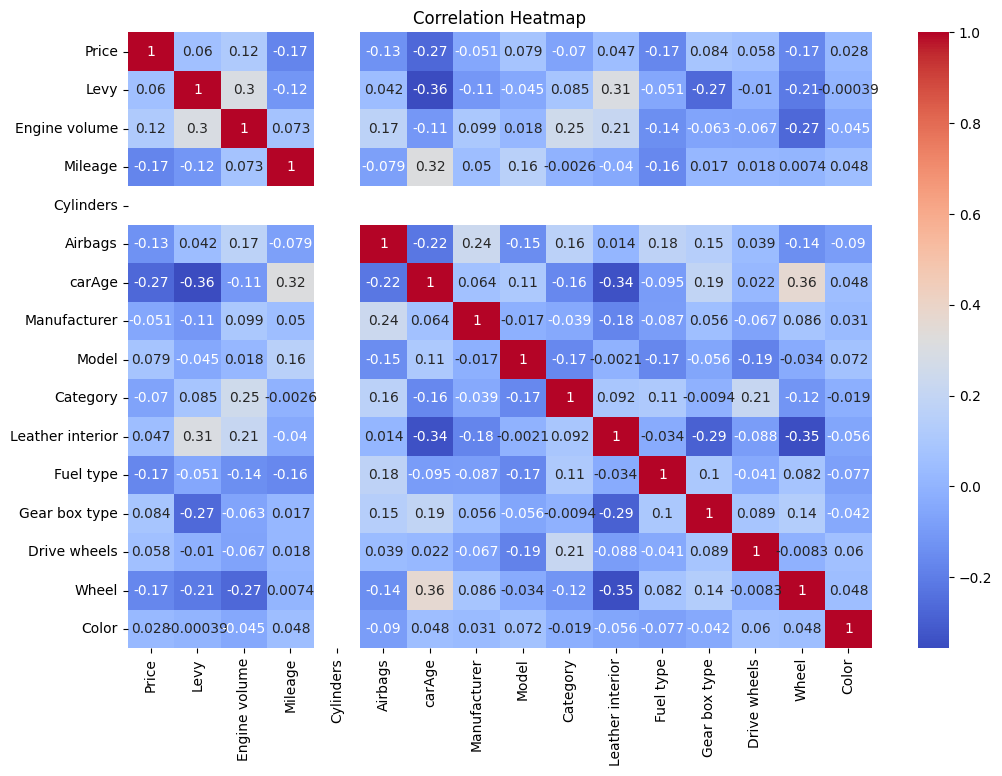

In [54]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 # Create The Model

In [55]:
x = data.drop("Price" , axis=1)

y = data["Price"]

In [56]:
x

,Levy,Engine volume,Mileage,Cylinders,Airbags,carAge,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,0.0,1.3,200000.0,4.0,2.0,19.0,21,684,3,0,5,3,1,1,1
3,862.0,2.5,168966.0,4.0,0.0,14.0,16,661,4,1,2,0,0,0,14
4,446.0,1.3,91901.0,4.0,4.0,11.0,21,684,3,1,5,0,1,0,12
5,891.0,2.0,160931.0,4.0,4.0,9.0,23,1305,4,1,1,0,1,0,14
6,761.0,1.8,258909.0,4.0,12.0,15.0,58,1154,3,1,2,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19226,NaN,NaN,NaN,NaN,NaN,NaN,41,1329,9,1,5,2,2,1,14
19227,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,0,0,1
19228,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,2,0,1
19231,NaN,NaN,NaN,NaN,NaN,NaN,36,601,9,1,1,0,2,0,7


In [57]:
x.isna().sum()

,0
Levy,7125
Engine volume,7125
Mileage,7125
Cylinders,7125
Airbags,7125
carAge,7125
Manufacturer,0
Model,0
Category,0
Leather interior,0


In [58]:
for i in x.columns:
    if x[i].isna().any():
        x[i].fillna(x[i].mean(), inplace=True)

<ipython-input-58-48c3e3924dd2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[i].fillna(x[i].mean(), inplace=True)


In [59]:
x

,Levy,Engine volume,Mileage,Cylinders,Airbags,carAge,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,0.000000,1.300000,200000.000000,4.0,2.000000,19.000000,21,684,3,0,5,3,1,1,1
3,862.000000,2.500000,168966.000000,4.0,0.000000,14.000000,16,661,4,1,2,0,0,0,14
4,446.000000,1.300000,91901.000000,4.0,4.000000,11.000000,21,684,3,1,5,0,1,0,12
5,891.000000,2.000000,160931.000000,4.0,4.000000,9.000000,23,1305,4,1,1,0,1,0,14
6,761.000000,1.800000,258909.000000,4.0,12.000000,15.000000,58,1154,3,1,2,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19226,596.045343,1.935783,122518.359861,4.0,6.411306,12.570133,41,1329,9,1,5,2,2,1,14
19227,596.045343,1.935783,122518.359861,4.0,6.411306,12.570133,36,601,9,1,1,0,0,0,1
19228,596.045343,1.935783,122518.359861,4.0,6.411306,12.570133,36,601,9,1,1,0,2,0,1
19231,596.045343,1.935783,122518.359861,4.0,6.411306,12.570133,36,601,9,1,1,0,2,0,7


In [60]:
y

,Price
2,8467.0
3,3607.0
4,11726.0
5,39493.0
6,1803.0
...,...
19226,NaN
19227,NaN
19228,NaN
19231,NaN


In [61]:
y.fillna(y.mean() , inplace=True)

In [62]:
y

,Price
2,8467.000000
3,3607.000000
4,11726.000000
5,39493.000000
6,1803.000000
...,...
19226,15483.044156
19227,15483.044156
19228,15483.044156
19231,15483.044156


split the data to x_train,x_test,y_train , y_test

In [63]:
x_train,x_test,y_train , y_test = train_test_split(x  , y , test_size=0.2 , random_state=42)

model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = SVR()
model4 = DecisionTreeRegressor()
model5 = GradientBoostingRegressor()

define lists for the models accuracy

In [64]:
mean_absolute_error_list = []
mean_squared_error_list = []
r2_score_list = []
triang_score_list = []
testing_score_list = []

modeling func

In [65]:
def modeling(model):
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    mean_abs = mean_absolute_error(y_test , y_pred)
    mean_aq = np.sqrt(mean_squared_error(y_test , y_pred))
    r2 = r2_score(y_test , y_pred)
    triang_score = model.score(x_train  , y_train)
    testing_score = model.score(x_test , y_test)
    print(f"{model} training score : {triang_score}  and testing score : {testing_score}")
    mean_absolute_error_list.append(mean_abs)
    mean_squared_error_list.append(mean_aq)
    r2_score_list.append(r2)
    triang_score_list.append(triang_score)
    testing_score_list.append(testing_score)



train the models

In [66]:
modeling(model1)
modeling(model2)
modeling(model3)
modeling(model4)
modeling(model5)

LinearRegression() training score : 0.19519192952975195  and testing score : 0.20249621108196303
RandomForestRegressor() training score : 0.9679670151244437  and testing score : 0.7703354565575713
SVR() training score : 0.010138181483930198  and testing score : 0.009633665596697982
DecisionTreeRegressor() training score : 0.9974278725152713  and testing score : 0.5844389132961054
GradientBoostingRegressor() training score : 0.6866273053701283  and testing score : 0.6737990575950961


make them in data frame

In [67]:
columns =["LinearRegression" ,"RandomForestRegressor" ,"SVR","DecisionTreeRegressor","GradientBoostingRegressor",]

df = {"Algorithm" : columns , "mean_absolute_error" : mean_absolute_error_list , "mean_squared_error" : mean_squared_error_list , "r2_score" : r2_score_list , "training_score" : triang_score_list ,"testing_score" : testing_score_list }

df= pd.DataFrame(df)
df

,Algorithm,mean_absolute_error,mean_squared_error,r2_score,training_score,testing_score
0,LinearRegression,5568.559415,8128.012275,0.202496,0.195192,0.202496
1,RandomForestRegressor,2147.159185,4361.791978,0.770335,0.967967,0.770335
2,SVR,5682.033376,9057.657776,0.009634,0.010138,0.009634
3,DecisionTreeRegressor,2671.279374,5867.261028,0.584439,0.997428,0.584439
4,GradientBoostingRegressor,3123.783265,5198.290897,0.673799,0.686627,0.673799


save the model

In [68]:
import pickle
file_name = "Cars_prediction_model.sav"
pickle.dump(model2 , open(file_name,'wb'))

In [69]:
data.columns

Index(['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
       'carAge', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

In [70]:
data.Manufacturer.unique()

array([21, 16, 23, 58, 36, 61, 46, 41, 8, 55, 11, 5, 28, 39, 54, 35, 18,
       15, 56, 32, 42, 3, 10, 38, 13, 27, 0, 60, 26, 53, 9, 33, 6, 43, 64,
       20, 31, 7, 51, 24, 45, 30, 37, 49, 62, 1, 50, 17, 25, 12, 57, 4,
       22, 59, 63, 48, 52, 40, 34, 14, 29, 47, 44, 2, 19], dtype=object)

In [71]:
data.Model.nunique()

1590

In [72]:
data.Category.unique()

array([3, 4, 9, 10, 7, 0, 1, 6, 2, 8, 5], dtype=object)

In [73]:
data['Fuel type'].unique()

array([5, 2, 1, 6, 4, 0, 3], dtype=object)

In [74]:
data['Gear box type'].unique()

array([3, 0, 2, 1], dtype=object)

In [75]:
data['Drive wheels'].unique()

array([1, 0, 2], dtype=object)

ID :  [45654403 44731507 45774419 ... 45804997 45793526 45813273]
Price :  [13328 16621  8467 ... 56814 63886 22075]
Levy :  ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784' '1024' '1357' '1301' '770' '922' '1438'
 '753' '607' '1363' '638' '490' '431' '565' '517' '833' '489' '1760' '986'
 '1841' '1620' '1360' '474' '1099' '978' '1624' '1946' '1268' '1307' '696'
 '649' '666' '2151' '551' '800' '971' '1323' '2377' '1845' '1083' '694'
 '463' '419' '345' '1515' '1505' '2056' '1203' '729' '460' '1356' '876'
 '911' '1190' '780' '448' '2410' '1848' '1148' '834' '1275' '1028' '1197'
 '724' '890' '1705' '505' '789' '2959' '518' '461' '1719' '2858' '3156'
 '2225' '2177' '1968' '1888' '1308' '2736' '1103' '557' '2195' '843'
 '1664' '723' '4508' '562' '501' '2018' '1076' '1202' '3301' '691' '1440'
 '1869' '1178' '418' '1820' '1413' '488' '1304' '363' '2108' '521' '1659'
 '87' '1411' '1528' '3292' '7058' '1578' '627' '874' '1996' '1488' '5679'
 '1234' '5603' '400' '889' '3268' '875' '949' '2265' '441' '742' '425'
 '2476' '2971' '614' '1816' '1375' '1405' '2297' '1062' '1113' '420'
 '2469' '658' '1951' '2670' '2578' '1995' '1032' '994' '1011' '2421'
 '1296' '155' '494' '426' '1086' '961' '2236' '1829' '764' '1834' '1054'
 '617' '1529' '2266' '637' '626' '1832' '1016' '2002' '1756' '746' '1285'
 '2690' '1118' '5332' '980' '1807' '970' '1228' '1195' '1132' '1768'
 '1384' '1080' '7063' '1817' '1452' '1975' '1368' '702' '1974' '1781'
 '1036' '944' '663' '364' '1539' '1345' '1680' '2209' '741' '1575' '695'
 '1317' '294' '1525' '424' '997' '1473' '1552' '2819' '2188' '1668' '3057'
 '799' '1502' '2606' '552' '1694' '1759' '1110' '399' '1470' '1174' '5877'
 '1474' '1688' '526' '686' '5908' '1107' '2070' '1468' '1246' '1685' '556'
 '1533' '1917' '1346' '732' '692' '579' '421' '362' '3505' '1855' '2711'
 '1586' '3739' '681' '1708' '2278' '1701' '722' '1482' '928' '827' '832'
 '527' '604' '173' '1341' '3329' '1553' '859' '167' '916' '828' '2082'
 '1176' '1108' '975' '3008' '1516' '2269' '1699' '2073' '1031' '1503'
 '2364' '1030' '1442' '5666' '2715' '1437' '2067' '1426' '2908' '1279'
 '866' '4283' '279' '2658' '3015' '2004' '1391' '4736' '748' '1466' '644'
 '683' '2705' '1297' '731' '1252' '2216' '3141' '3273' '1518' '1723'
 '1588' '972' '682' '1094' '668' '175' '967' '402' '3894' '1960' '1599'
 '2000' '2084' '1621' '714' '1109' '3989' '873' '1572' '1163' '1991'
 '1716' '1673' '2562' '2874' '965' '462' '605' '1948' '1736' '3518' '2054'
 '2467' '1681' '1272' '1205' '750' '2156' '2566' '115' '524' '3184' '676'
 '1678' '612' '328' '955' '1441' '1675' '3965' '2909' '623' '822' '867'
 '3025' '1993' '792' '636' '4057' '3743' '2337' '2570' '2418' '2472'
 '3910' '1662' '2123' '2628' '3208' '2080' '3699' '2913' '864' '2505'
 '870' '7536' '1924' '1671' '1064' '1836' '1866' '4741' '841' '1369'
 '5681' '3112' '1366' '2223' '1198' '1039' '3811' '3571' '1387' '1171'
 '1365' '1531' '1590' '11706' '2308' '4860' '1641' '1045' '1901']
Manufacturer :  ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Model :  ['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']
Prod. year :  [2010 2011 2006 2014 2016 2013 2007 1999 1997 2018 2008 2012 2017 2001
 1995 2009 2000 2019 2015 2004 1998 1990 2005 2003 1985 1996 2002 1993
 1992 1988 1977 1989 1994 2020 1984 1986 1991 1983 1953 1964 1974 1987
 1943 1978 1965 1976 1957 1980 1939 1968 1947 1982 1981 1973]
Category :  ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Leather interior :  ['Yes' 'No']
Fuel type :  ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
Engine volume :  ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3' '2.0 Turbo'
 '2.2 Turbo' '4.7' '1.5' '4.4' '3.0 Turbo' '1.4 Turbo' '3.6' '2.3'
 '1.5 Turbo' '1.6 Turbo' '2.2' '2.3 Turbo' '1.4' '5.5' '2.8 Turbo' '3.2'
 '3.8' '4.6' '1.2' '5' '1.7' '2.9' '0.5' '1.8 Turbo' '2.4 Turbo'
 '3.5 Turbo' '1.9' '2.7' '4.8' '5.3' '0.4' '2.8' '3.2 Turbo' '1.1' '2.1'
 '0.7' '5.4' '1.3 Turbo' '3.7' '1' '2.5 Turbo' '2.6' '1.9 Turbo'
 '4.4 Turbo' '4.7 Turbo' '0.8' '0.2 Turbo' '5.7' '4.8 Turbo' '4.6 Turbo'
 '6.7' '6.2' '1.2 Turbo' '3.4' '1.7 Turbo' '6.3 Turbo' '2.7 Turbo' '4.3'
 '4.2' '2.9 Turbo' '0' '4.0 Turbo' '20' '3.6 Turbo' '0.3' '3.7 Turbo'
 '5.9' '5.5 Turbo' '0.2' '2.1 Turbo' '5.6' '6' '0.7 Turbo' '0.6 Turbo'
 '6.8' '4.5' '0.6' '7.3' '0.1' '1.0 Turbo' '6.3' '4.5 Turbo' '0.8 Turbo'
 '4.2 Turbo' '3.1' '5.0 Turbo' '6.4' '3.9' '5.7 Turbo' '0.9' '0.4 Turbo'
 '5.4 Turbo' '0.3 Turbo' '5.2' '5.8' '1.1 Turbo']
Mileage :  ['186005 km' '192000 km' '200000 km' ... '140607 km' '307325 km'
 '186923 km']
Cylinders :  [ 6.  4.  8.  1. 12.  3.  2. 16.  5.  7.  9. 10. 14.]
Gear box type :  ['Automatic' 'Tiptronic' 'Variator' 'Manual']
Drive wheels :  ['4x4' 'Front' 'Rear']
Doors :  ['04-May' '02-Mar' '>5']
Wheel :  ['Left wheel' 'Right-hand drive']
Color :  ['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']
Airbags :  [12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]


In [76]:
data['Wheel'].unique()

array([1, 0], dtype=object)

In [77]:
data['Leather interior'].unique()

array([0, 1], dtype=object)

In [78]:
data['Color'].unique()

array([1, 14, 12, 7, 2, 13, 11, 6, 15, 3, 5, 0, 8, 4, 10, 9], dtype=object)

In [79]:
data["Engine volume"].unique()

array([1.3, 2.5, 2. , 1.8, 2.4, 1.6, 2.2, 1.5, 1.4, 2.3, 1.2, 1.7, 2.9,
       1.9, 3.5, 2.1, 2.7, 1. , 0.8, 3. , 3.3, 2.8, 3.2, 1.1, nan])

In [80]:
data["Airbags"].unique()

array([ 2.,  0.,  4., 12.,  8., 10.,  6.,  1., 16.,  7.,  9.,  5., 11.,
        3., 14., 15., 13., nan])